## Model --- NEURAL EVOLUTION 

Neural network evolved by genetic algorithm.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import logistic
import pandas as pd
import copy
from random import shuffle, sample
import random

### Creating a simple blackjack game.

In [34]:
class Game:
    def __init__(self):
        self.deck =  5 * list(range(1,11))
        shuffle(self.deck)
        self.game_running = False
        self.cumulative_draw = 0 
        self.best_player_score = 0
    def start_game(self, player_list):
        while  len([p for p in player_list if p.burn == False and p.stop == False]) > 1:
            for player in [p_t for p_t in player_list if p_t.burn == False and p_t.stop == False]:
                #print player.name,player.points
                if player.decision(self)[0] == 0:
                    player.stop_game()
                else:
                    self.cumulative_draw += player.draw(self.deck)
                if self.best_player_score < player.points:
                    self.best_player_score = player.points
        #print [[p_e.name, p_e.points] for p_e in player_list]
        winner_table =  [p_e for p_e in player_list if p_e.burn == False]
        winner_table = sorted(winner_table, key = lambda x : 21 - x.points)
        #print [p_e.points for p_e in winner_table] 
        #print 'Game ended...'
        
         
        if set([p_end.points for p_end in winner_table]) == 1 or not winner_table:
            #print 'ko'
            return 'ko'
        else:
            #print 'ganhador',   winner_table[0].name 
            return winner_table[0].name
        
        

### Defining the Player class

In [35]:
class Player:
    def __init__(self, name):
        self.stop = False
        self.burn = False
        self.points = 0
        self.name = name
        self.neural_network = None
    def decision(self, game_obj):
        
        out = sample([0,1], 1) # the output shoud be [0] or [1]
        #print out 
        return out  # random behavior
    
    def stop_game(self):
        #print self.name, 'Stop'
        self.stop = True
    def draw(self, deck_game):
        
        card = deck_game.pop()
        #print self.name, 'comprou card', card
        self.points += card
        if self.points > 21:
            self.burn = True
            #print self.name, 'BURNEDD!'
        return card
            
    
    

        

### Gerating simple Players usig Player class inheritance and  overwriting the decision method.

In [36]:
class First_strategy(Player):
    def decision(self, game_obj):
        if self.points < 15:
            return [1]
        else:
            return [0]
    
class Second_strategy(Player):
    def decision(self, game_obj):
        return [1]

### Simulating a simple championship with 3 different players.

In [37]:
matchs = []

for x in range(100):
    jogo = Game()
    lucas = First_strategy('Lucas')
    miura = Player('Miura')
    sergio = Second_strategy('Sergio')
    
    matchs.append(jogo.start_game([lucas, miura, sergio]))

print (len([m for m in matchs if m == 'Miura']))
print (matchs)

7
['Sergio', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Miura', 'Lucas', 'Lucas', 'Sergio', 'Sergio', 'Sergio', 'Lucas', 'Sergio', 'Sergio', 'Sergio', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Sergio', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'ko', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Miura', 'Miura', 'Lucas', 'Lucas', 'Miura', 'Sergio', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Miura', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Sergio', 'Lucas', 'Lucas', 'Lucas', 'Sergio', 'Lucas', 'Miura', 'Lucas', 'Lucas']


###  Neural network class implementation with forward propagation

In [38]:
class Network:
    def __init__(self, input_number = 2):
        self.l_1 = np.random.uniform(-1,1, [10,input_number])

        self.l_2 = np.random.uniform(-1,1,[10,10])
        self.l_end = np.random.uniform(-1,1,[1,10])
        self.layers_stack = [self.l_1 , self.l_2 , self.l_end]
    
    
    def sigmoid (self, x): return 1/(1 + np.exp(-x))
    
    def foward(self, input_value):
        #print input_value
        res_l1 =  np.array([self.sigmoid(l1_s) for l1_s in      input_value.dot(self.l_1.T)])
        res_l2 = np.array([ self.sigmoid(l2_s)  for l2_s in     res_l1.dot(self.l_2.T)])
        res_end = np.array([self.sigmoid (l_r) for l_r in       res_l2.dot(self.l_end.T)])
        #print res_end
        return res_end
    
    def mutate(self, layer):
        index_to_mutate = [np.random.randint(layer.shape[0]), np.random.randint(layer.shape[1])]
        #print 'mutate',  np.random.uniform(-1, 1)
        layer[index_to_mutate[0], index_to_mutate[1]] += np.random.uniform(-0.01, 0.01)
        
        
    def mutate_all_layers(self):
        for l in self.layers_stack:
            self.mutate(l)
    

### Creating a Neural Network Player

The decision method returns 0 (stop),1 (draw a card)
The inputs  are: 

- Agent score.
- Highest opponent pontuation.
- Sum of all cards played until that moment

In [39]:
class Neural_strategy(Player):
    def decision(self, game_obj):
        best_rank_player = game_obj.best_player_score
        #print best_rank_player
        #print  [self.neural_network.foward(np.array([ self.points, best_rank_player ,game_obj.cumulative_draw]))]

#         return [int(round(self.neural_network.foward(np.array([ self.points, best_rank_player ,game_obj.cumulative_draw]))))]
        return [round(x) for x in self.neural_network.foward(np.array([ self.points, best_rank_player ,game_obj.cumulative_draw]))]
    def init_neural_activity(self):
        self.neural_network = Network(input_number = 3)
    def reset_status(self):
        self.stop = False
        self.burn = False
        self.points = 0
        

### Training/Evolving the neural networks

using the follow parameters. 
-  population = 500  
-  iterations = 100  
- matchs per championship = 300  
- The two best AI neural networks are choosed to ploriferate and mutate.  
- Fitness fuction is given as the mean of championship won games. 

In [40]:
best_and_mean_scores = []
p_size= 500
population = [Neural_strategy('AI') for n in range(0,p_size)]

[p.init_neural_activity() for p in population] #starting network random weights

from tqdm import tqdm
for i_n in range(200):
    fitness = []
    for ai in tqdm(population):
        matchs = []
        f = 0
        for x in range(60):
            jogo = Game()
            lucas = First_strategy('Lucas')
            matchs.append(jogo.start_game([ ai, lucas]))
            ai.reset_status()
        #print matchs
        f =  100 * (len([m for m in matchs if m == 'AI'])/float(len(matchs)))
        #print f 
        fitness.append(f)
    higher_fitness = sorted( [[f, p_f] for f , p_f in zip(fitness, population)], key=lambda s: s[0])
    print ('Iteration MEAN:', np.mean([v[0] for v in higher_fitness]))
        
    loss_str= 'Best value: {}'.format(str(higher_fitness[-1][0]))
    best_and_mean_scores.append([higher_fitness[-1][0], np.mean([v[0] for v in higher_fitness])])
    itr_str = 'Iteration: {}'.format( str(i_n))
    print (itr_str, loss_str)
    #print [ h[0] for h in  higher_fitness[-5:]]
    best_creatures = higher_fitness[-10:]
    #print [float(b_c) for b_c in best_creatures]
    population = [copy.deepcopy(random.choice(best_creatures)[1]) for i in range(0, p_size)]
    [p_m.neural_network.mutate_all_layers() for p_m in population]

    

  1%|          | 6/500 [00:00<00:09, 51.84it/s]

Iteration MEAN: 11.95
Iteration: 0 Best value: 46.666666666666664


  2%|▏         | 12/500 [00:00<00:09, 54.07it/s]

Iteration MEAN: 30.576666666666664
Iteration: 1 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:08, 59.30it/s]

Iteration MEAN: 36.47
Iteration: 2 Best value: 56.666666666666664


  2%|▏         | 12/500 [00:00<00:08, 58.10it/s]

Iteration MEAN: 37.726666666666674
Iteration: 3 Best value: 58.333333333333336


  2%|▏         | 12/500 [00:00<00:08, 58.80it/s]

Iteration MEAN: 38.96333333333333
Iteration: 4 Best value: 55.00000000000001


  1%|▏         | 7/500 [00:00<00:08, 60.93it/s]

Iteration MEAN: 38.84666666666667
Iteration: 5 Best value: 55.00000000000001


  1%|▏         | 7/500 [00:00<00:07, 63.91it/s]

Iteration MEAN: 38.60666666666666
Iteration: 6 Best value: 56.666666666666664


  3%|▎         | 13/500 [00:00<00:08, 60.36it/s]

Iteration MEAN: 39.37
Iteration: 7 Best value: 56.666666666666664


  3%|▎         | 14/500 [00:00<00:07, 61.10it/s]

Iteration MEAN: 38.7
Iteration: 8 Best value: 56.666666666666664


  3%|▎         | 13/500 [00:00<00:08, 58.53it/s]

Iteration MEAN: 38.66
Iteration: 9 Best value: 56.666666666666664


  3%|▎         | 13/500 [00:00<00:08, 59.70it/s]

Iteration MEAN: 39.193333333333335
Iteration: 10 Best value: 60.0


  1%|          | 6/500 [00:00<00:08, 56.47it/s]

Iteration MEAN: 38.82
Iteration: 11 Best value: 60.0


  2%|▏         | 12/500 [00:00<00:08, 56.84it/s]

Iteration MEAN: 39.74
Iteration: 12 Best value: 61.66666666666667


  1%|▏         | 7/500 [00:00<00:08, 61.23it/s]

Iteration MEAN: 38.92
Iteration: 13 Best value: 63.33333333333333


  2%|▏         | 12/500 [00:00<00:08, 58.93it/s]

Iteration MEAN: 38.95666666666667
Iteration: 14 Best value: 60.0


  2%|▏         | 12/500 [00:00<00:08, 59.94it/s]

Iteration MEAN: 38.8
Iteration: 15 Best value: 58.333333333333336


  1%|▏         | 7/500 [00:00<00:07, 63.71it/s]

Iteration MEAN: 39.0
Iteration: 16 Best value: 56.666666666666664


  1%|          | 6/500 [00:00<00:09, 52.66it/s]

Iteration MEAN: 38.68666666666667
Iteration: 17 Best value: 53.333333333333336


  3%|▎         | 13/500 [00:00<00:08, 60.16it/s]

Iteration MEAN: 39.046666666666674
Iteration: 18 Best value: 58.333333333333336


  3%|▎         | 13/500 [00:00<00:08, 60.33it/s]

Iteration MEAN: 38.95333333333333
Iteration: 19 Best value: 63.33333333333333


  3%|▎         | 13/500 [00:00<00:08, 57.89it/s]

Iteration MEAN: 38.66
Iteration: 20 Best value: 60.0


  1%|▏         | 7/500 [00:00<00:08, 61.31it/s]

Iteration MEAN: 39.043333333333344
Iteration: 21 Best value: 60.0


  1%|          | 6/500 [00:00<00:08, 59.67it/s]

Iteration MEAN: 39.30333333333334
Iteration: 22 Best value: 56.666666666666664


  2%|▏         | 12/500 [00:00<00:08, 58.61it/s]

Iteration MEAN: 39.06333333333334
Iteration: 23 Best value: 61.66666666666667


  2%|▏         | 12/500 [00:00<00:08, 56.19it/s]

Iteration MEAN: 39.27666666666667
Iteration: 24 Best value: 56.666666666666664


  1%|          | 6/500 [00:00<00:08, 57.23it/s]

Iteration MEAN: 39.5
Iteration: 25 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:08, 58.35it/s]

Iteration MEAN: 39.67333333333333
Iteration: 26 Best value: 58.333333333333336


  2%|▏         | 12/500 [00:00<00:08, 58.51it/s]

Iteration MEAN: 39.92
Iteration: 27 Best value: 58.333333333333336


  2%|▏         | 12/500 [00:00<00:08, 54.39it/s]

Iteration MEAN: 39.92666666666667
Iteration: 28 Best value: 60.0


  1%|          | 6/500 [00:00<00:08, 56.57it/s]

Iteration MEAN: 39.63
Iteration: 29 Best value: 55.00000000000001


  3%|▎         | 13/500 [00:00<00:08, 58.22it/s]

Iteration MEAN: 40.416666666666664
Iteration: 30 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:09, 51.53it/s]

Iteration MEAN: 39.94333333333333
Iteration: 31 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:09, 52.57it/s]

Iteration MEAN: 39.66
Iteration: 32 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:08, 56.81it/s]

Iteration MEAN: 39.37666666666667
Iteration: 33 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:08, 59.01it/s]

Iteration MEAN: 39.843333333333334
Iteration: 34 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:09, 51.09it/s]

Iteration MEAN: 39.49666666666667
Iteration: 35 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:09, 52.23it/s]

Iteration MEAN: 39.480000000000004
Iteration: 36 Best value: 61.66666666666667


  2%|▏         | 12/500 [00:00<00:08, 56.23it/s]

Iteration MEAN: 39.76666666666667
Iteration: 37 Best value: 58.333333333333336


  2%|▏         | 12/500 [00:00<00:09, 54.06it/s]

Iteration MEAN: 39.933333333333344
Iteration: 38 Best value: 58.333333333333336


  1%|          | 3/500 [00:00<00:23, 21.05it/s]

Iteration MEAN: 39.91
Iteration: 39 Best value: 60.0


  1%|          | 5/500 [00:00<00:10, 48.24it/s]

Iteration MEAN: 40.04
Iteration: 40 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:09, 50.78it/s]

Iteration MEAN: 40.57333333333333
Iteration: 41 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:09, 53.14it/s]

Iteration MEAN: 39.91
Iteration: 42 Best value: 60.0


  1%|          | 6/500 [00:00<00:09, 52.65it/s]

Iteration MEAN: 40.596666666666664
Iteration: 43 Best value: 56.666666666666664


  1%|          | 5/500 [00:00<00:11, 42.80it/s]

Iteration MEAN: 40.75333333333333
Iteration: 44 Best value: 60.0


  2%|▏         | 10/500 [00:00<00:11, 41.69it/s]

Iteration MEAN: 40.99
Iteration: 45 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:11, 44.18it/s]

Iteration MEAN: 40.47333333333333
Iteration: 46 Best value: 60.0


  2%|▏         | 10/500 [00:00<00:10, 47.36it/s]

Iteration MEAN: 40.663333333333334
Iteration: 47 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:10, 48.87it/s]

Iteration MEAN: 40.43333333333333
Iteration: 48 Best value: 58.333333333333336


  1%|          | 5/500 [00:00<00:10, 46.23it/s]

Iteration MEAN: 40.50666666666667
Iteration: 49 Best value: 56.666666666666664


  1%|          | 6/500 [00:00<00:09, 50.53it/s]

Iteration MEAN: 40.13
Iteration: 50 Best value: 58.333333333333336


  2%|▏         | 12/500 [00:00<00:09, 51.17it/s]

Iteration MEAN: 40.91
Iteration: 51 Best value: 58.333333333333336


  1%|          | 6/500 [00:00<00:09, 52.68it/s]

Iteration MEAN: 40.91333333333333
Iteration: 52 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:09, 51.76it/s]

Iteration MEAN: 40.97333333333333
Iteration: 53 Best value: 60.0


  1%|          | 5/500 [00:00<00:10, 45.84it/s]

Iteration MEAN: 41.236666666666665
Iteration: 54 Best value: 60.0


  1%|          | 6/500 [00:00<00:09, 52.04it/s]

Iteration MEAN: 40.85333333333333
Iteration: 55 Best value: 66.66666666666666


  1%|          | 6/500 [00:00<00:08, 55.40it/s]

Iteration MEAN: 41.32666666666666
Iteration: 56 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:08, 55.19it/s]

Iteration MEAN: 41.12333333333333
Iteration: 57 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:09, 49.95it/s]

Iteration MEAN: 41.88666666666667
Iteration: 58 Best value: 65.0


  2%|▏         | 12/500 [00:00<00:09, 52.66it/s]

Iteration MEAN: 41.79
Iteration: 59 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:09, 52.62it/s]

Iteration MEAN: 41.22
Iteration: 60 Best value: 65.0


  1%|          | 6/500 [00:00<00:09, 52.22it/s]

Iteration MEAN: 42.31999999999999
Iteration: 61 Best value: 61.66666666666667


  2%|▏         | 11/500 [00:00<00:10, 48.41it/s]

Iteration MEAN: 42.04333333333333
Iteration: 62 Best value: 60.0


  1%|          | 5/500 [00:00<00:09, 49.88it/s]

Iteration MEAN: 41.97
Iteration: 63 Best value: 60.0


  1%|          | 5/500 [00:00<00:10, 48.99it/s]

Iteration MEAN: 42.55333333333333
Iteration: 64 Best value: 63.33333333333333


  2%|▏         | 12/500 [00:00<00:08, 54.72it/s]

Iteration MEAN: 42.56666666666667
Iteration: 65 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:09, 50.93it/s]

Iteration MEAN: 42.67
Iteration: 66 Best value: 61.66666666666667


  2%|▏         | 10/500 [00:00<00:10, 48.61it/s]

Iteration MEAN: 42.61
Iteration: 67 Best value: 60.0


  1%|          | 5/500 [00:00<00:12, 41.24it/s]

Iteration MEAN: 42.703333333333326
Iteration: 68 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:10, 47.31it/s]

Iteration MEAN: 42.40333333333333
Iteration: 69 Best value: 61.66666666666667


  2%|▏         | 11/500 [00:00<00:09, 49.60it/s]

Iteration MEAN: 42.56
Iteration: 70 Best value: 58.333333333333336


  2%|▏         | 12/500 [00:00<00:09, 52.53it/s]

Iteration MEAN: 42.49
Iteration: 71 Best value: 63.33333333333333


  1%|          | 5/500 [00:00<00:10, 48.36it/s]

Iteration MEAN: 42.92333333333334
Iteration: 72 Best value: 63.33333333333333


  2%|▏         | 10/500 [00:00<00:10, 47.57it/s]

Iteration MEAN: 43.473333333333336
Iteration: 73 Best value: 58.333333333333336


  1%|          | 5/500 [00:00<00:11, 41.58it/s]

Iteration MEAN: 42.60333333333333
Iteration: 74 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:12, 41.19it/s]

Iteration MEAN: 43.153333333333336
Iteration: 75 Best value: 65.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 43.34
Iteration: 76 Best value: 61.66666666666667


  1%|          | 4/500 [00:00<00:12, 39.12it/s]

Iteration MEAN: 43.91
Iteration: 77 Best value: 61.66666666666667


  1%|          | 4/500 [00:00<00:14, 34.70it/s]

Iteration MEAN: 43.39333333333334
Iteration: 78 Best value: 65.0


  1%|          | 5/500 [00:00<00:11, 42.99it/s]

Iteration MEAN: 42.82666666666666
Iteration: 79 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:11, 43.57it/s]

Iteration MEAN: 43.09
Iteration: 80 Best value: 61.66666666666667


  2%|▏         | 10/500 [00:00<00:10, 48.20it/s]

Iteration MEAN: 42.92
Iteration: 81 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:10, 49.00it/s]

Iteration MEAN: 43.223333333333336
Iteration: 82 Best value: 65.0


  1%|          | 4/500 [00:00<00:13, 37.38it/s]

Iteration MEAN: 43.12
Iteration: 83 Best value: 66.66666666666666


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 42.726666666666674
Iteration: 84 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:11, 42.14it/s]

Iteration MEAN: 42.813333333333325
Iteration: 85 Best value: 58.333333333333336


  2%|▏         | 9/500 [00:00<00:12, 39.70it/s]

Iteration MEAN: 43.19666666666667
Iteration: 86 Best value: 63.33333333333333


100%|██████████| 500/500 [00:18<00:00, 26.98it/s]


Iteration MEAN: 43.803333333333335
Iteration: 87 Best value: 61.66666666666667


  1%|          | 3/500 [00:00<00:16, 29.34it/s]

Iteration MEAN: 43.693333333333335
Iteration: 88 Best value: 61.66666666666667


  2%|▏         | 10/500 [00:00<00:10, 45.57it/s]

Iteration MEAN: 43.26666666666667
Iteration: 89 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:09, 49.08it/s]

Iteration MEAN: 43.16000000000001
Iteration: 90 Best value: 63.33333333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 43.54333333333334
Iteration: 91 Best value: 63.33333333333333


  2%|▏         | 10/500 [00:00<00:10, 48.29it/s]

Iteration MEAN: 43.57
Iteration: 92 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:09, 53.89it/s]

Iteration MEAN: 43.30666666666667
Iteration: 93 Best value: 63.33333333333333


  1%|          | 6/500 [00:00<00:09, 53.59it/s]

Iteration MEAN: 43.81000000000001
Iteration: 94 Best value: 60.0


  1%|          | 5/500 [00:00<00:11, 44.80it/s]

Iteration MEAN: 43.88
Iteration: 95 Best value: 61.66666666666667


  2%|▏         | 10/500 [00:00<00:10, 48.38it/s]

Iteration MEAN: 43.603333333333346
Iteration: 96 Best value: 61.66666666666667


  2%|▏         | 11/500 [00:00<00:09, 49.83it/s]

Iteration MEAN: 43.82666666666667
Iteration: 97 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:11, 44.40it/s]

Iteration MEAN: 43.91666666666667
Iteration: 98 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:11, 42.00it/s]

Iteration MEAN: 44.37
Iteration: 99 Best value: 63.33333333333333


  2%|▏         | 11/500 [00:00<00:09, 50.72it/s]

Iteration MEAN: 44.33666666666667
Iteration: 100 Best value: 60.0


  2%|▏         | 12/500 [00:00<00:09, 51.11it/s]

Iteration MEAN: 44.24666666666667
Iteration: 101 Best value: 63.33333333333333


  2%|▏         | 11/500 [00:00<00:09, 49.84it/s]

Iteration MEAN: 44.61
Iteration: 102 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:11, 43.88it/s]

Iteration MEAN: 44.92333333333334
Iteration: 103 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:10, 46.73it/s]

Iteration MEAN: 44.81666666666667
Iteration: 104 Best value: 63.33333333333333


  1%|          | 5/500 [00:00<00:10, 48.64it/s]

Iteration MEAN: 44.18000000000001
Iteration: 105 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:10, 48.73it/s]

Iteration MEAN: 44.27333333333334
Iteration: 106 Best value: 60.0


  1%|          | 4/500 [00:00<00:13, 37.48it/s]

Iteration MEAN: 44.63666666666667
Iteration: 107 Best value: 66.66666666666666


  1%|          | 4/500 [00:00<00:12, 38.80it/s]

Iteration MEAN: 44.72333333333334
Iteration: 108 Best value: 66.66666666666666


  1%|          | 4/500 [00:00<00:12, 39.63it/s]

Iteration MEAN: 44.56666666666667
Iteration: 109 Best value: 65.0


  1%|          | 5/500 [00:00<00:11, 43.05it/s]

Iteration MEAN: 44.75333333333334
Iteration: 110 Best value: 61.66666666666667


  2%|▏         | 10/500 [00:00<00:10, 46.02it/s]

Iteration MEAN: 44.866666666666674
Iteration: 111 Best value: 65.0


  1%|          | 5/500 [00:00<00:10, 46.34it/s]

Iteration MEAN: 44.85333333333334
Iteration: 112 Best value: 63.33333333333333


  2%|▏         | 10/500 [00:00<00:09, 49.44it/s]

Iteration MEAN: 44.873333333333335
Iteration: 113 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:10, 48.99it/s]

Iteration MEAN: 45.26
Iteration: 114 Best value: 65.0


  2%|▏         | 12/500 [00:00<00:09, 52.29it/s]

Iteration MEAN: 44.72333333333333
Iteration: 115 Best value: 60.0


  1%|          | 6/500 [00:00<00:09, 51.82it/s]

Iteration MEAN: 45.62
Iteration: 116 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:10, 46.37it/s]

Iteration MEAN: 44.99333333333333
Iteration: 117 Best value: 65.0


  1%|          | 5/500 [00:00<00:10, 45.42it/s]

Iteration MEAN: 44.95
Iteration: 118 Best value: 63.33333333333333


  2%|▏         | 10/500 [00:00<00:12, 40.59it/s]

Iteration MEAN: 45.10333333333334
Iteration: 119 Best value: 68.33333333333333


  2%|▏         | 12/500 [00:00<00:09, 51.26it/s]

Iteration MEAN: 44.56
Iteration: 120 Best value: 65.0


  1%|          | 6/500 [00:00<00:09, 51.42it/s]

Iteration MEAN: 45.17333333333334
Iteration: 121 Best value: 68.33333333333333


  1%|          | 6/500 [00:00<00:09, 53.01it/s]

Iteration MEAN: 44.916666666666664
Iteration: 122 Best value: 63.33333333333333


  2%|▏         | 11/500 [00:00<00:09, 50.06it/s]

Iteration MEAN: 45.476666666666674
Iteration: 123 Best value: 63.33333333333333


  1%|          | 6/500 [00:00<00:09, 52.58it/s]

Iteration MEAN: 45.31666666666667
Iteration: 124 Best value: 66.66666666666666


  1%|          | 6/500 [00:00<00:09, 52.74it/s]

Iteration MEAN: 46.34
Iteration: 125 Best value: 66.66666666666666


  2%|▏         | 12/500 [00:00<00:09, 50.35it/s]

Iteration MEAN: 45.313333333333325
Iteration: 126 Best value: 61.66666666666667


  1%|          | 6/500 [00:00<00:09, 50.23it/s]

Iteration MEAN: 46.27666666666666
Iteration: 127 Best value: 65.0


  2%|▏         | 12/500 [00:00<00:09, 50.79it/s]

Iteration MEAN: 45.67333333333334
Iteration: 128 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:11, 43.55it/s]

Iteration MEAN: 46.39333333333334
Iteration: 129 Best value: 68.33333333333333


  1%|          | 4/500 [00:00<00:12, 39.95it/s]

Iteration MEAN: 46.46666666666666
Iteration: 130 Best value: 63.33333333333333


  1%|          | 5/500 [00:00<00:11, 44.78it/s]

Iteration MEAN: 46.33333333333333
Iteration: 131 Best value: 68.33333333333333


  2%|▏         | 10/500 [00:00<00:11, 43.53it/s]

Iteration MEAN: 46.71666666666666
Iteration: 132 Best value: 63.33333333333333


  2%|▏         | 9/500 [00:00<00:12, 39.54it/s]

Iteration MEAN: 46.15666666666667
Iteration: 133 Best value: 65.0


  1%|          | 5/500 [00:00<00:11, 43.57it/s]

Iteration MEAN: 46.53333333333333
Iteration: 134 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:11, 43.14it/s]

Iteration MEAN: 45.743333333333325
Iteration: 135 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:10, 48.13it/s]

Iteration MEAN: 46.36
Iteration: 136 Best value: 70.0


  1%|          | 5/500 [00:00<00:10, 47.45it/s]

Iteration MEAN: 46.51666666666666
Iteration: 137 Best value: 63.33333333333333


  2%|▏         | 9/500 [00:00<00:11, 41.82it/s]

Iteration MEAN: 46.70666666666666
Iteration: 138 Best value: 66.66666666666666


  1%|          | 6/500 [00:00<00:09, 50.24it/s]

Iteration MEAN: 46.25
Iteration: 139 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:10, 46.44it/s]

Iteration MEAN: 46.77
Iteration: 140 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:10, 47.78it/s]

Iteration MEAN: 46.47999999999999
Iteration: 141 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:10, 47.84it/s]

Iteration MEAN: 46.633333333333326
Iteration: 142 Best value: 61.66666666666667


  1%|          | 5/500 [00:00<00:10, 46.65it/s]

Iteration MEAN: 46.063333333333325
Iteration: 143 Best value: 70.0


  1%|          | 5/500 [00:00<00:11, 44.33it/s]

Iteration MEAN: 46.486666666666665
Iteration: 144 Best value: 65.0


  0%|          | 2/500 [00:00<00:30, 16.41it/s]

Iteration MEAN: 46.83333333333333
Iteration: 145 Best value: 68.33333333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 46.22333333333333
Iteration: 146 Best value: 68.33333333333333


  1%|          | 4/500 [00:00<00:15, 32.70it/s]

Iteration MEAN: 46.163333333333334
Iteration: 147 Best value: 70.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 46.73333333333333
Iteration: 148 Best value: 66.66666666666666


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 46.41333333333333
Iteration: 149 Best value: 65.0


  2%|▏         | 8/500 [00:00<00:13, 37.00it/s]

Iteration MEAN: 45.56666666666667
Iteration: 150 Best value: 61.66666666666667


  2%|▏         | 10/500 [00:00<00:11, 41.75it/s]

Iteration MEAN: 46.54333333333333
Iteration: 151 Best value: 63.33333333333333


  1%|          | 4/500 [00:00<00:13, 36.63it/s]

Iteration MEAN: 47.69666666666667
Iteration: 152 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:11, 44.07it/s]

Iteration MEAN: 47.633333333333326
Iteration: 153 Best value: 65.0


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 47.076666666666654
Iteration: 154 Best value: 65.0


  1%|          | 5/500 [00:00<00:11, 41.83it/s]

Iteration MEAN: 48.086666666666666
Iteration: 155 Best value: 68.33333333333333


  2%|▏         | 8/500 [00:00<00:12, 39.37it/s]

Iteration MEAN: 48.03333333333334
Iteration: 156 Best value: 65.0


  2%|▏         | 10/500 [00:00<00:10, 44.56it/s]

Iteration MEAN: 48.193333333333335
Iteration: 157 Best value: 66.66666666666666


  1%|          | 4/500 [00:00<00:13, 36.24it/s]

Iteration MEAN: 47.79333333333334
Iteration: 158 Best value: 65.0


  1%|          | 5/500 [00:00<00:10, 45.81it/s]

Iteration MEAN: 47.79
Iteration: 159 Best value: 70.0


  1%|          | 5/500 [00:00<00:10, 46.23it/s]

Iteration MEAN: 47.56666666666667
Iteration: 160 Best value: 63.33333333333333


  1%|          | 5/500 [00:00<00:11, 44.05it/s]

Iteration MEAN: 48.04333333333334
Iteration: 161 Best value: 68.33333333333333


  1%|          | 5/500 [00:00<00:10, 46.16it/s]

Iteration MEAN: 47.96666666666666
Iteration: 162 Best value: 65.0


  1%|          | 5/500 [00:00<00:11, 43.74it/s]

Iteration MEAN: 47.92666666666667
Iteration: 163 Best value: 68.33333333333333


  1%|          | 5/500 [00:00<00:11, 42.83it/s]

Iteration MEAN: 47.39666666666667
Iteration: 164 Best value: 63.33333333333333


  2%|▏         | 10/500 [00:00<00:11, 41.12it/s]

Iteration MEAN: 47.70666666666666
Iteration: 165 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:12, 40.51it/s]

Iteration MEAN: 47.65
Iteration: 166 Best value: 65.0


  1%|          | 4/500 [00:00<00:13, 37.83it/s]

Iteration MEAN: 47.64333333333333
Iteration: 167 Best value: 68.33333333333333


  1%|          | 4/500 [00:00<00:13, 37.27it/s]

Iteration MEAN: 47.65
Iteration: 168 Best value: 68.33333333333333


  2%|▏         | 10/500 [00:00<00:10, 46.61it/s]

Iteration MEAN: 47.91
Iteration: 169 Best value: 65.0


  1%|          | 5/500 [00:00<00:10, 48.52it/s]

Iteration MEAN: 48.18333333333334
Iteration: 170 Best value: 65.0


  1%|          | 5/500 [00:00<00:12, 40.04it/s]

Iteration MEAN: 48.616666666666674
Iteration: 171 Best value: 70.0


  1%|          | 3/500 [00:00<00:17, 28.66it/s]

Iteration MEAN: 48.07
Iteration: 172 Best value: 66.66666666666666


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 48.43333333333334
Iteration: 173 Best value: 66.66666666666666


  1%|          | 4/500 [00:00<00:12, 38.51it/s]

Iteration MEAN: 47.976666666666674
Iteration: 174 Best value: 66.66666666666666


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 48.27
Iteration: 175 Best value: 66.66666666666666


  1%|          | 4/500 [00:00<00:14, 35.12it/s]

Iteration MEAN: 48.506666666666675
Iteration: 176 Best value: 75.0


  1%|          | 5/500 [00:00<00:11, 44.31it/s]

Iteration MEAN: 48.42333333333334
Iteration: 177 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:10, 46.21it/s]

Iteration MEAN: 48.793333333333344
Iteration: 178 Best value: 68.33333333333333


  2%|▏         | 10/500 [00:00<00:11, 44.49it/s]

Iteration MEAN: 48.71
Iteration: 179 Best value: 68.33333333333333


  1%|          | 4/500 [00:00<00:12, 39.79it/s]

Iteration MEAN: 48.506666666666675
Iteration: 180 Best value: 66.66666666666666


  2%|▏         | 10/500 [00:00<00:10, 44.69it/s]

Iteration MEAN: 48.67666666666667
Iteration: 181 Best value: 68.33333333333333


  1%|          | 5/500 [00:00<00:11, 44.46it/s]

Iteration MEAN: 48.63333333333334
Iteration: 182 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:11, 41.72it/s]

Iteration MEAN: 49.31333333333334
Iteration: 183 Best value: 70.0


  2%|▏         | 10/500 [00:00<00:11, 42.41it/s]

Iteration MEAN: 48.90333333333334
Iteration: 184 Best value: 76.66666666666667


  1%|          | 4/500 [00:00<00:13, 35.78it/s]

Iteration MEAN: 49.226666666666674
Iteration: 185 Best value: 71.66666666666667


  1%|          | 4/500 [00:00<00:12, 38.70it/s]

Iteration MEAN: 49.393333333333345
Iteration: 186 Best value: 70.0


  1%|          | 5/500 [00:00<00:11, 44.20it/s]

Iteration MEAN: 49.24666666666667
Iteration: 187 Best value: 70.0


  1%|          | 5/500 [00:00<00:11, 42.53it/s]

Iteration MEAN: 49.14666666666667
Iteration: 188 Best value: 70.0


  1%|          | 5/500 [00:00<00:10, 45.51it/s]

Iteration MEAN: 49.12
Iteration: 189 Best value: 71.66666666666667


  2%|▏         | 10/500 [00:00<00:10, 47.25it/s]

Iteration MEAN: 49.26666666666667
Iteration: 190 Best value: 70.0


  2%|▏         | 10/500 [00:00<00:11, 41.98it/s]

Iteration MEAN: 49.08666666666667
Iteration: 191 Best value: 68.33333333333333


  1%|          | 5/500 [00:00<00:10, 46.15it/s]

Iteration MEAN: 49.79
Iteration: 192 Best value: 68.33333333333333


  0%|          | 0/500 [00:00<?, ?it/s]

Iteration MEAN: 49.56333333333334
Iteration: 193 Best value: 70.0


100%|██████████| 500/500 [00:31<00:00, 15.78it/s]


Iteration MEAN: 49.30666666666667
Iteration: 194 Best value: 73.33333333333333


  1%|          | 6/500 [00:00<00:17, 28.01it/s]

Iteration MEAN: 48.71666666666667
Iteration: 195 Best value: 71.66666666666667


  1%|          | 4/500 [00:00<00:13, 36.62it/s]

Iteration MEAN: 49.37000000000001
Iteration: 196 Best value: 66.66666666666666


  1%|          | 5/500 [00:00<00:11, 44.11it/s]

Iteration MEAN: 49.02
Iteration: 197 Best value: 71.66666666666667


  1%|          | 5/500 [00:00<00:11, 42.15it/s]

Iteration MEAN: 49.19
Iteration: 198 Best value: 66.66666666666666


100%|██████████| 500/500 [00:18<00:00, 26.41it/s]


Iteration MEAN: 49.28000000000001
Iteration: 199 Best value: 68.33333333333333


In [9]:
## Ploting the mean game values 

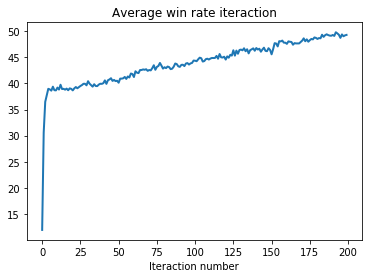

In [41]:
df_training = pd.DataFrame(best_and_mean_scores, columns=['best_result', 'mean_result'])

plt.plot(df_training['mean_result'], lw=2)
plt.title('Average win rate iteraction')
plt.xlabel('Iteraction number')
plt.show()

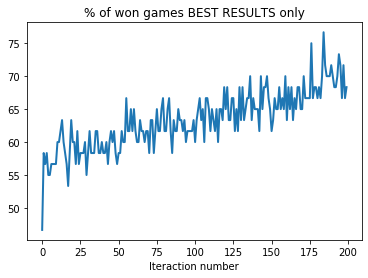

In [42]:
plt.plot(df_training['best_result'], lw=2)
plt.title('% of won games BEST RESULTS only')
plt.xlabel('Iteraction number')
plt.show()